In [79]:
from Bio import SeqIO
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [21]:
#Print total number of seqs before and after filtering (for seqs longer than 1000nt)
full_cov_data = '../data/human_cov_full.fasta'
full_cov_filtered = '../results/filtered_cov_full.fasta'

cov_total = 0
cov_seq_lengths = []
cov_filtered = 0
cov_filtered_lengths = []
with open(full_cov_data, "r") as handle:
    for record in SeqIO.parse(handle, "fasta"):
        cov_total+=1
        cov_seq_lengths.append(len(record.seq))
with open(full_cov_filtered, "r") as handle:
    for record in SeqIO.parse(handle, "fasta"):
        cov_filtered+=1
        cov_filtered_lengths.append(len(record.seq))

print(f'total seqs: {cov_total}\nafter filtering: {cov_filtered}')

total seqs: 4606
after filtering: 3886


In [19]:
#Find how many total sequences for each virus
#And then how many of these sequences align to each gene
viruses = ['oc43', '229e', 'nl63', 'hku1']
virus_totals = {}
virus_filtered_totals = {}
for virus in viruses:
    virus_total = 0
    virus_filtered_total = 0
    virus_data = '../'+str(virus)+'/data/'+str(virus)+'_full.fasta'
    virus_filtered = '../'+str(virus)+'/results/filtered_'+str(virus)+'_full.fasta'
    with open(virus_data, "r") as handle:
        for record in SeqIO.parse(handle, "fasta"):
            virus_total+=1
    with open(virus_filtered, "r") as handle:
        for record in SeqIO.parse(handle, "fasta"):
            virus_filtered_total+=1
    virus_totals[virus] = virus_total
    virus_filtered_totals[virus] = virus_filtered_total

for virus in viruses:
    print(f'total {virus} seqs: {virus_totals[virus]}\nafter filtering: {virus_filtered_totals[virus]}')

total oc43 seqs: 349
after filtering: 309
total 229e seqs: 153
after filtering: 85
total nl63 seqs: 333
after filtering: 213
total hku1 seqs: 217
after filtering: 51


In [20]:
def get_virus_genes(virus):
    if virus == 'nl63':
        genes_dict = {'replicase1ab':"replicase polyprotein 1ab", 'spike':"spike protein", 'protein3':"protein 3", 
                      'envelope':"envelope protein", 'membrane':"membrane protein", 'nucleocapsid':"nucleocapsid protein", 
                      's1':'spike_subdomain1', 's2':'spike_subdomain2'}
    elif virus == '229e':
        genes_dict = {'replicase1ab':"replicase polyprotein 1ab", 'replicase1a': "replicase polyprotein 1a", 'spike':"surface glycoprotein", 
                      'protein4a':"4a protein", 'protein4b':"4b protein",
                      'envelope':"envelope protein", 'membrane':"membrane protein", 'nucleocapsid':"nucleocapsid protein", 
                      's1':'spike_subdomain1', 's2':'spike_subdomain2'}
    elif virus == 'hku1':
        genes_dict = {'replicase1ab':"orf1ab polyprotein", 'he':"hemagglutinin-esterase glycoprotein", 
                      'spike':"spike glycoprotein", 'nonstructural4':"non-structural protein",
                      'envelope':"small membrane protein", 'membrane':"membrane glycoprotein", 
                      'nucleocapsid':"nucleocapsid phosphoprotein", 'nucleocapsid2':"nucleocapsid phosphoprotein 2", 
                      's1':'spike_subdomain1', 's2':'spike_subdomain2'}
    elif virus == 'oc43':
        genes_dict = {'replicase1ab':"replicase polyprotein", 'nonstructural2a':"NS2a protein",
                      'he':"HE protein", 'spike':"S protein", 'nonstructural2':"NS2 protein",
                      'envelope':"NS3 protein", 'membrane':"M protein", 
                      'nucleocapsid':"N protein", 'n2protein':"N2 protein", 
                      's1':'spike_subdomain1', 's2':'spike_subdomain2'}
    return genes_dict

In [108]:
def virus_seq_coverage(virus):
    strain_counts = {}
    
    full_datafile = '../'+str(virus)+'/data/'+str(virus)+'_full.fasta'
    with open(full_datafile, "r") as handle:
        for record in SeqIO.parse(handle, "fasta"):
            strain_counts[record.id.split('|')[0]] = 0
    
    
    gene_list = get_virus_genes(virus).keys()
    
    virus_gene_coverage = {}
    for gene in gene_list:
        if gene!= 's1' and gene!= 's2':
            gene_total = 0
            gene_seq_file = '../'+str(virus)+'/data/'+str(virus)+'_'+str(gene)+'.fasta'
            with open(gene_seq_file, "r") as handle:
                for record in SeqIO.parse(handle, "fasta"):
                    strain_counts[record.id.split('|')[0]]+=1
                    gene_total+=1
            virus_gene_coverage[gene] = gene_total
    
    strain_coverage = pd.DataFrame(list(strain_counts.items()), index=[x for x in range(len(strain_counts))], 
                                   columns=['strain', 'gene_coverage'])
#     plt.hist(strain_coverage['gene_coverage'], bins = [x for x in range(0,max(strain_coverage['gene_coverage']))])
    
    gene_coverage = pd.DataFrame(list(virus_gene_coverage.items()), index=[x for x in range(len(virus_gene_coverage))], 
                                   columns=['gene', 'gene_coverage'])
    fig, ax = plt.subplots(figsize=(15,8))
    ax = sns.barplot(x='gene', y='gene_coverage', color='salmon', data=gene_coverage)
    plt.ylim(0,320)
    plt.title(str(virus), size=20)
    plt.xlabel('gene', size=16)
    plt.ylabel('sequences covering each gene', size=16)
    
    no_coverage = len(strain_coverage[strain_coverage['gene_coverage']==0])
    at_least_one_gene = len(strain_coverage[strain_coverage['gene_coverage']>=1])
    print(f'{virus} sequences that dont cover any genes: {no_coverage}\nsequences that cover at least one gene: {at_least_one_gene}')

oc43 sequences that dont cover any genes: 41
sequences that cover at least one gene: 308
229e sequences that dont cover any genes: 73
sequences that cover at least one gene: 80
nl63 sequences that dont cover any genes: 175
sequences that cover at least one gene: 158
hku1 sequences that dont cover any genes: 166
sequences that cover at least one gene: 51


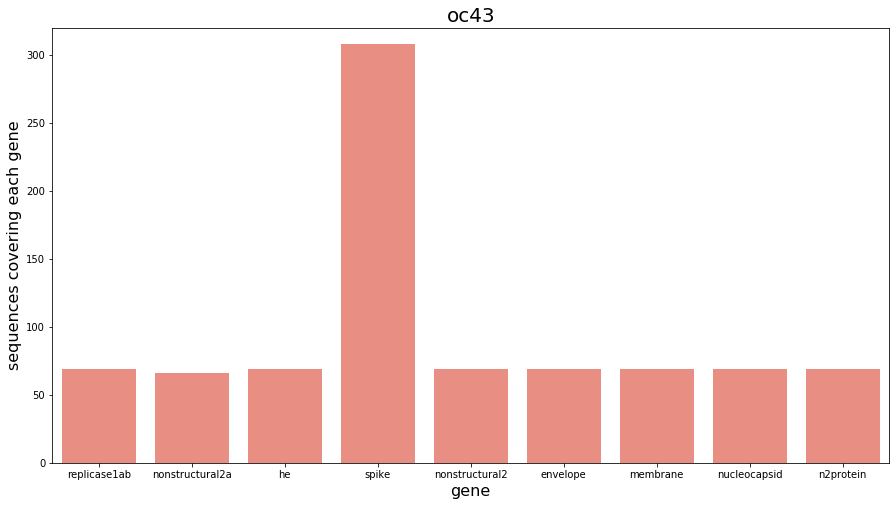

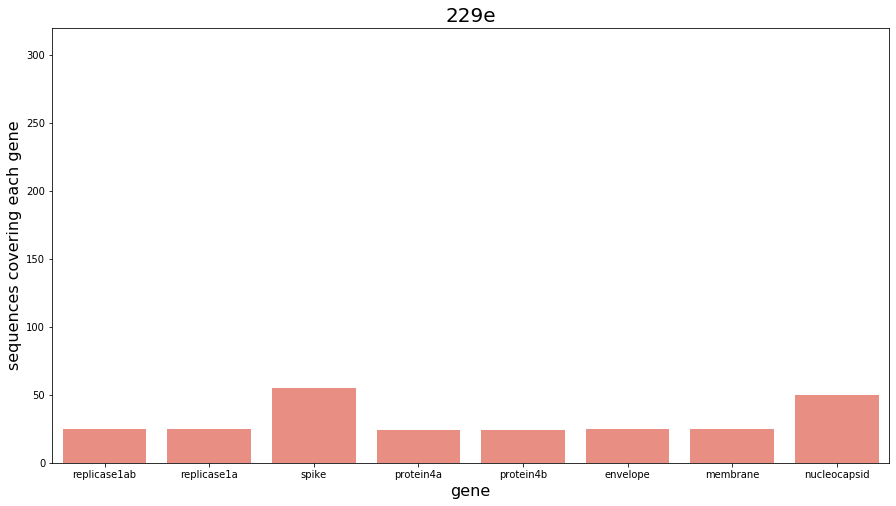

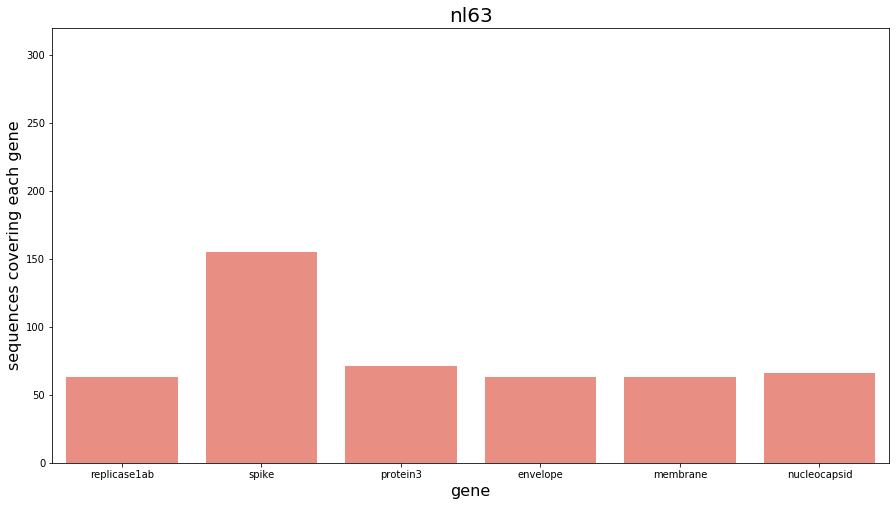

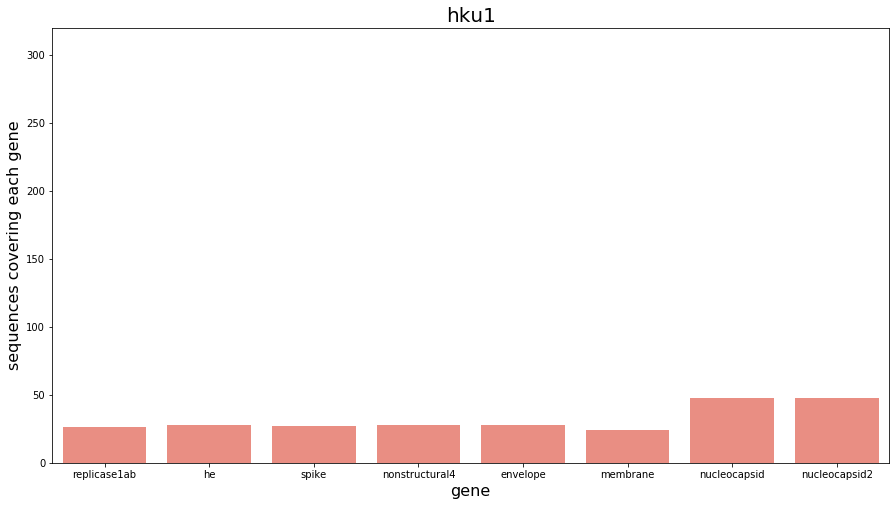

In [109]:
viruses = ['oc43', '229e', 'nl63', 'hku1']
for virus in viruses:
    virus_seq_coverage(virus)